In [2]:
import pandas as pd

file_path = '/content/City.csv'
df = pd.read_csv(file_path)
df['Population'] = df['Population'].apply(lambda x: int(x.replace(',', '')))
df['Users'] = df['Users'].apply(lambda x: int(x.replace(',', '')))
df.head()
#1 --> checking for a difference in proportion in users in each city
#2 --> checking if the average cost in each city differs from each other
#3 --> seasonality?
#4 --> Paying with cash v. card
#5 --> Income

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [ ]:
print(df.dtypes)

City          object
Population     int64
Users          int64
dtype: object


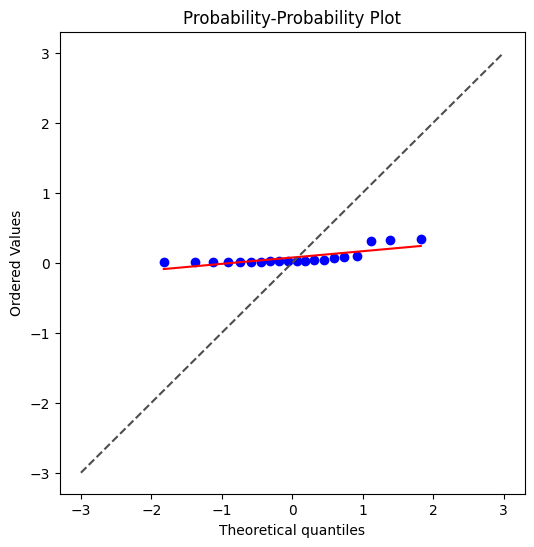

In [ ]:
1. #H0: there is no difference in proportion
   #Ha: there is a difference in proportion
#sample size is 20 --> check for norm
from scipy import stats
import matplotlib.pyplot as plt
df['User_Proportion'] = df['Users'] / df['Population']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
res = stats.probplot(df['User_Proportion'], plot=ax)

# Add a line with slope 1 for reference
ax.plot([-3, 3], [-3, 3], ls="--", c=".3")

# Set labels and title
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered Values')
ax.set_title('Probability-Probability Plot')

plt.show()

#Data is normal, so we can use the z-score test to test for a difference in the proportions.

In [ ]:

# Define your list of proportions

df['User_Proportion'] = df['Users'] / df['Population']
print(df)
# Calculate the overall proportion of users to the total population
overall_user_proportion = df['Users'].sum() / df['Population'].sum()

# Calculate the standard error of the proportion
df['Standard_Error'] = df.apply(lambda row: (row['User_Proportion'] * (1 - row['User_Proportion'])), axis=1)

#print(df['Standard_Error'])
# Calculate the z-score for each city (xbar - mu)/(standard error)
df['Z_Score'] = (df['User_Proportion'] - overall_user_proportion) / df['Standard_Error']

# Perform a two-tailed z-test
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha / 2)  # 95% confidence level
df['Significant'] = df['Z_Score'].abs() > critical_value
#Lower proportion means lower z-score, displaying significance
print(df[['City', 'Z_Score', 'Significant']])


                City  Population   Users  User_Proportion  Standard_Error  \
0        NEW YORK NY     8405837  302149         0.035945        0.034653   
1         CHICAGO IL     1955130  164468         0.084121        0.077045   
2     LOS ANGELES CA     1595037  144132         0.090363        0.082197   
3           MIAMI FL     1339155   17675         0.013199        0.013024   
4     SILICON VALLEY     1177609   27247         0.023138        0.022602   
5      ORANGE COUNTY     1030185   12994         0.012613        0.012454   
6       SAN DIEGO CA      959307   69995         0.072964        0.067640   
7         PHOENIX AZ      943999    6133         0.006497        0.006455   
8          DALLAS TX      942908   22157         0.023499        0.022946   
9         ATLANTA GA      814885   24701         0.030312        0.029393   
10         DENVER CO      754233   12421         0.016468        0.016197   
11         AUSTIN TX      698371   14978         0.021447        0.020987   

Based on this test, we can see that there is a difference in proportions between the cities. When looking at the data more critically,  cities labeled as "False" (San Francisco, Washington DC, Seattle) tend to have a higher proportion of users compared to others.  Based on this, I formulated a second hypothesis to test if there are more users in cities with higher cost.

In [7]:
#2 --> checking if the average cost in each city differs from each other
#Ho: the average cost doesn't differ
#Ha: the average cost does differ
file_path2 = '/content/Cab_Data.csv'
df2 = pd.read_csv(file_path2)
df2.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/8/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/8/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/8/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/8/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


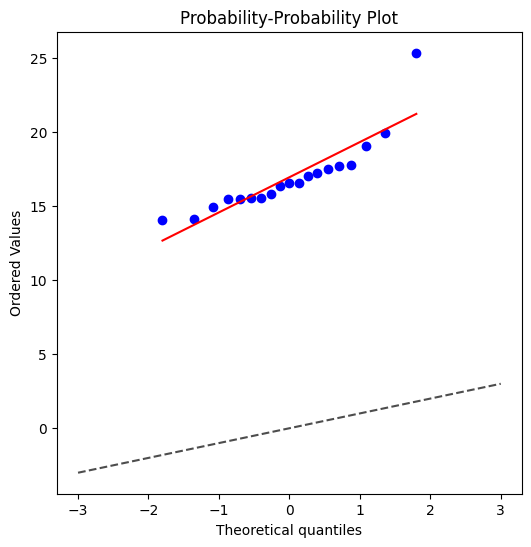

                Price Charged  KM Travelled  Average Price
City                                                      
ATLANTA GA         2980241.72     168643.76      17.671817
AUSTIN TX          1877142.50     109207.30      17.188801
BOSTON MA         10359755.42     670388.18      15.453368
CHICAGO IL        19841318.52    1281704.39      15.480417
DALLAS TX          3142429.91     157782.05      19.916270
DENVER CO          1462531.51      85869.75      17.031976
LOS ANGELES CA    17795624.41    1088735.65      16.345221
MIAMI FL           2580135.20     145418.17      17.742867
NASHVILLE TN        959108.13      68324.74      14.037494
NEW YORK NY       56954061.67    2248809.74      25.326314
ORANGE COUNTY      1554873.21      88826.69      17.504572
PHOENIX AZ          756682.64      45825.08      16.512413
PITTSBURGH PA       442538.64      29705.76      14.897402
SACRAMENTO CA       761611.95      53861.20      14.140271
SAN DIEGO CA       7136380.59     460503.69      15.4969

In [ ]:


# Group by city and sum the cost of trips and kilometers traveled
total_cost_per_km = df2.groupby('City')[['Price Charged', 'KM Travelled']].sum()

total_cost_per_km['Average Price'] = total_cost_per_km['Price Charged']/total_cost_per_km['KM Travelled']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
res = stats.probplot(total_cost_per_km['Average Price'], plot=ax)

# Add a line with slope 1 for reference
ax.plot([-3, 3], [-3, 3], ls="--", c=".3")

# Set labels and title
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Ordered Values')
ax.set_title('Probability-Probability Plot')

plt.show()
# Display the total cost per kilometer for each city
print(total_cost_per_km)

#Normal with one outlier, but we can use the z-score test to test for a difference in the proportions.

In [ ]:
import numpy as np
standard_error = total_cost_per_km['Average Price'].std() / np.sqrt(len(total_cost_per_km))

print(standard_error)

overall_avg_km = total_cost_per_km['Price Charged'].sum()/total_cost_per_km['KM Travelled'].sum()
# Calculate the z-score for each city
total_cost_per_km['Z_Score'] = (total_cost_per_km['Average Price'] - overall_avg_km ) / standard_error

# Perform a two-tailed z-test
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha / 2)  # 95% confidence level
total_cost_per_km['Significant'] = total_cost_per_km['Z_Score'] > -critical_value

print(total_cost_per_km['Z_Score'], total_cost_per_km['Significant'])



0.5820979730074122
City
ATLANTA GA        -1.875629
AUSTIN TX         -2.705415
BOSTON MA         -5.686755
CHICAGO IL        -5.640287
DALLAS TX          1.980170
DENVER CO         -2.974828
LOS ANGELES CA    -4.154621
MIAMI FL          -1.753571
NASHVILLE TN      -8.119119
NEW YORK NY       11.274214
ORANGE COUNTY     -2.162943
PHOENIX AZ        -3.867397
PITTSBURGH PA     -6.641863
SACRAMENTO CA     -7.942557
SAN DIEGO CA      -5.611967
SEATTLE WA        -5.128938
SILICON VALLEY     0.437622
TUCSON AZ         -5.506574
WASHINGTON DC     -3.806073
Name: Z_Score, dtype: float64 City
ATLANTA GA         True
AUSTIN TX         False
BOSTON MA         False
CHICAGO IL        False
DALLAS TX          True
DENVER CO         False
LOS ANGELES CA    False
MIAMI FL           True
NASHVILLE TN      False
NEW YORK NY        True
ORANGE COUNTY     False
PHOENIX AZ        False
PITTSBURGH PA     False
SACRAMENTO CA     False
SAN DIEGO CA      False
SEATTLE WA        False
SILICON VALLEY     True
T

There are two groups here, and  cities tend to charge more for rides compared to other cities. That is , Atlanta, Dallas, Miami, New York, and Silicon Valley tend to have the more expensive rides. However, based on this test and the previous test , we can conclude that the proportion of users does not affect the cost of rides.

In [5]:
#3 Testing for association between age and income
file_path3 = '/content/Customer_ID.csv'
df3 = pd.read_csv(file_path3)
df3.head()
len(df3)

49171

In [ ]:
import numpy as np
# Convert lists to NumPy arrays
x_array = np.array(df3['Age'])
y_array = np.array(df3['Income (USD/Month)'])

# Calculate means
mean_x = np.mean(x_array)
mean_y = np.mean(y_array)

# Calculate Pearson correlation coefficient
numerator = np.sum((x_array - mean_x) * (y_array - mean_y))
denominator = np.sqrt(np.sum((x_array - mean_x)**2) * np.sum((y_array - mean_y)**2))
corr_coef = numerator / denominator

print("Pearson correlation coefficient:", corr_coef)


#There is no linear association, but I suspect a quadratic association based on data inspection

Pearson correlation coefficient: 0.0001563390369167492


In [ ]:
# Create quadratic features
X = np.column_stack([x_array, x_array**2])

# Add a column of ones for the intercept term
X = np.column_stack([np.ones_like(x_array), X])

# Perform ordinary least squares (OLS) regression
coefficients = np.linalg.lstsq(X, y_array, rcond=None)[0]

# Extract coefficients
intercept, coef_linear, coef_quadratic = coefficients

# Compute predicted y values
y_pred = intercept + coef_linear * x_array + coef_quadratic * x_array**2

# Compute total sum of squares (TSS)
y_mean = np.mean(y_array)
TSS = np.sum((y_array - y_mean)**2)

# Compute residual sum of squares (RSS)
RSS = np.sum((y_array - y_pred)**2)

# Compute coefficient of determination (R^2)
R_squared = 1 - (RSS / TSS)

print("Coefficient of determination (R^2):", R_squared)

Coefficient of determination (R^2): 3.2640100255942883e-07


In [6]:
#Conclusion: There is no association between age and income.

#Now looking at if a customer's income is different between those that paid by card vs. paying by cash
file_path4 = '/content/Transaction_ID.csv'
df4 = pd.read_csv(file_path4)
df4.head()
len(df4)
#Ho: Card income = Cash income
#Ha: Card income /= Cash income

440098

In [ ]:
merged_transaction = pd.merge(df3,df4, on = 'Customer ID')
merged_transaction.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [ ]:
income_cash = merged_transaction[merged_transaction['Payment_Mode'] == 'Cash']['Income (USD/Month)']
income_card = merged_transaction[merged_transaction['Payment_Mode'] == 'Card']['Income (USD/Month)']

# Calculate the means and variances of incomes for cash and card payments
mean_cash = income_cash.mean()
mean_card = income_card.mean()
var_cash = income_cash.var()
var_card = income_card.var()
n_cash = len(income_cash)
n_card = len(income_card)
# Calculate the pooled standard deviation
pooled_std = np.sqrt((var_cash * (n_cash - 1) + var_card * (n_card - 1)) / (n_cash + n_card - 2))

# Calculate the t-statistic (Xbar1 - xbar2)/ (std * Sqrt((1/n1) + (1/n2)))
t_statistic = (mean_cash - mean_card) / (pooled_std * np.sqrt(1 / n_cash + 1 / n_card))

# Calculate the degrees of freedom
df = n_cash + n_card - 2

# Calculate the p-value using the cumulative distribution function of the t-distribution
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.6872006814459101
p-value: 0.4919566371234092


We fail to reject the null hypothesis, indicating there is no difference in income between those who pay via card versus cash. Some people just prefer to pay via cash.

In [ ]:
#5 Is there seasonality in the data?
df2.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/8/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/8/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/8/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/8/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


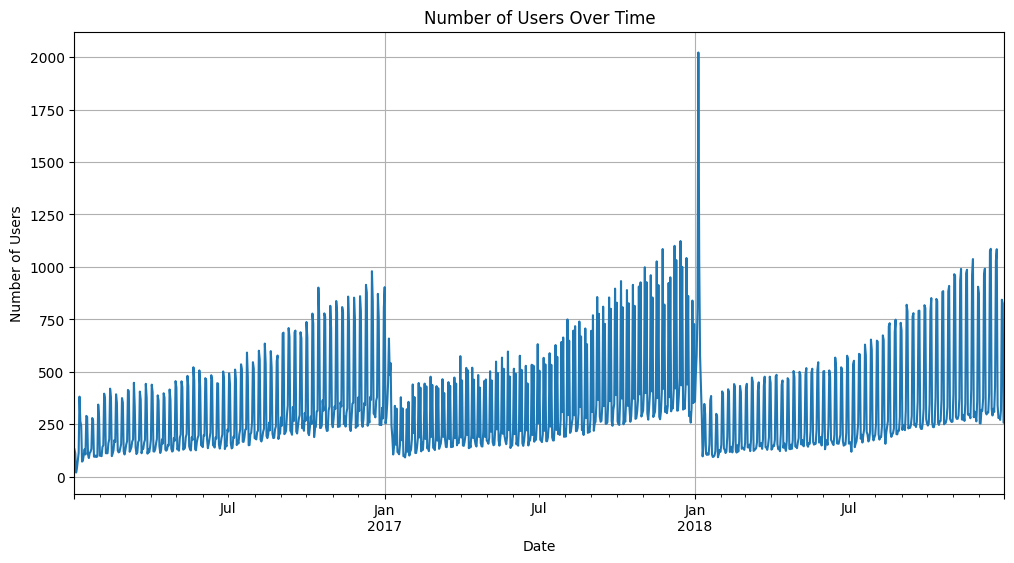

In [ ]:
import matplotlib.pyplot as plt
df2['Date of Travel'] = pd.to_datetime(df2['Date of Travel'])

# Group by 'Date of Travel' and count the number of transactions (users) for each date
user_counts = df2.groupby('Date of Travel').size()

# Plot the time series of user counts
plt.figure(figsize=(12, 6))
user_counts.plot()
plt.title('Number of Users Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

Based on the data, I see a certain seasonality component. As the winter time approaches, there appears to be more users than usual. This could be due to the fact that the weather gets colder than usual, prompting an increase in ride services.